In [1]:
import pandas as pd
import modules
import numpy as np
import cleanup

# foreign_worker_info_education_other

In [2]:
col_list=[ 'foreign_worker_info_education_other' , 'fw_info_education_other']
visas_df = pd.read_csv("../data/us_perm_visas.csv" , usecols=col_list)


C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (29,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Es hat sich gezeigt, dass die Spalten mit dem prefix fw und foreign_worker oft zusammengeführt werden können.
Um die Annahme zu belegen haben wir eine Fuktion `print_count_of_values_relation` geschrieben.

Sie gibt für alle enthaltenen Spalten eines DataFrames ein Diagramm, welches aufzeigt wie viele Spalten non-nan Werte enthalten und wie diese verteilt sind.

Ein Wert von 1 auf der Y-Achse bedeuted, dass ein Wert enthalten ist.
Ein Wert von 0 auf der Y-Achse bedeuted, dass ein nan Wert vorhanden ist.

Die X-Achse steht für den Index des jeweiligen Eintrages.

foreign_worker_info_education_other
3940/374362 1%
Filled: |--------------------------------------------------| 1.1% Rows

fw_info_education_other
150015/374362 40%
Filled: |████████████████████------------------------------| 40.1% Rows



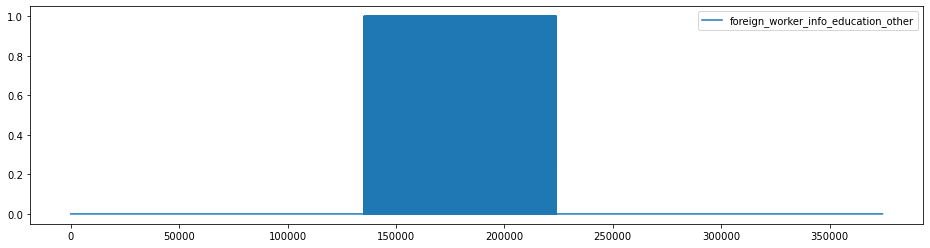

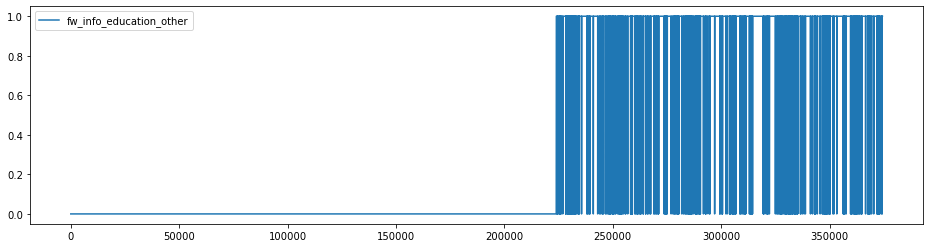

In [3]:
modules.print_count_of_values_relation(visas_df, True, True)

Es ist zu erkennen, dass sich in diesem Fall die Spalten `foreign_worker_info_education_other` und `fw_info_education_other` optimal ergänzen, auch wenn weiterhin Lücken bleiben, die nicht befüllt werden können.

Es wird noch ein Blick auf die Inhalte geworfen, um sicherzugehen, dass bei Spalten auch inhaltlich identisch sind.

In [4]:
visas_df['fw_info_education_other'].value_counts()

None                                                                        143672
MEDICAL DEGREE                                                                 639
MD                                                                             393
M.D.                                                                           239
3-YR POST SECONDARY EDUCATION *SEE H.14                                        191
                                                                             ...  
NO DEGREE COMPLETED                                                              1
BACH DEGREE EQUIV BASED ON A 3-YR DEGREE AND 2-YR CERTIFICATE                    1
ONE YEAR OF BACHELOR'S LEVEL COURSE WORK                                         1
THREE (3) YEARS POST-SECONDARY EDUCATION TOWARDS BACHELOR OF ARTS DEGREE         1
GENERAL EDUCATION                                                                1
Name: fw_info_education_other, Length: 2031, dtype: int64

In [5]:
visas_df['foreign_worker_info_education_other'].value_counts()

MEDICAL DEGREE                                                               402
MD                                                                           247
M.D.                                                                         163
3-YR POST SECONDARY EDUCATION *SEE H.14                                      146
3-YR POST SECONDARY EDUCATION *SEE H-14                                      130
                                                                            ... 
MD/MBBS                                                                        1
M.D. (EQUIVALENT TO A U.S. MEDICAL DEGREE)                                     1
DOCTOR & SURGEON (M.D. EQUIVALENT)                                             1
EQUIVALENT OF 3 YEARS OF U.S. ACADEMIC STUDIES TOWARD A BACHELOR'S DEGREE      1
FOREIGN EQUIV TO B.S. IN AGRICULTURAL MGMT IN EDUC, TRAINING & EXP             1
Name: foreign_worker_info_education_other, Length: 1327, dtype: int64

Es ist erkennbar, dass die Inhalte identisch sind. Die Spalten werden zusammengeführt.
Vorab werden jedoch die Spalten im einzelnen noch Bereinigt.
Leerwerte und 'None' werden zu NaN umgewandelt.

In [6]:
visas_df[visas_df['foreign_worker_info_education_other']=='None'].size

0

In [7]:
visas_df[visas_df['fw_info_education_other']=='None'].size


287344

In [8]:
visas_df['foreign_worker_info_education_other'] = cleanup.replaceNoneOrEmptyByNa(visas_df['foreign_worker_info_education_other'])
visas_df['fw_info_education_other'] = cleanup.replaceNoneOrEmptyByNa(visas_df['fw_info_education_other'])

In [9]:
# The two different columns 'foreign_worker_info_education_other' and 'fw_info_education_other' get merged because they both contain similar information and don't overap each other.
# The columns get merged through simmple concatenation, therefor all na values are replaced by ''.
# Afterwards alle cells containing '' will be repaled again by na values.
visas_df['fw_info_education_other_merged'] = visas_df['foreign_worker_info_education_other'].fillna('') + visas_df[
    'fw_info_education_other'].fillna('')
visas_df['fw_info_education_other_merged'] = visas_df['fw_info_education_other_merged'].replace(r'^\s*$', np.nan, regex=True)

foreign_worker_info_education_other
3940/374362 1%
Filled: |--------------------------------------------------| 1.1% Rows

fw_info_education_other
6343/374362 2%
Filled: |--------------------------------------------------| 1.7% Rows

fw_info_education_other_merged
10283/374362 3%
Filled: |█-------------------------------------------------| 2.7% Rows



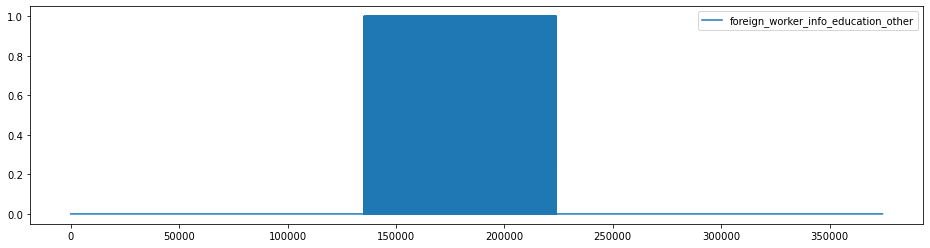

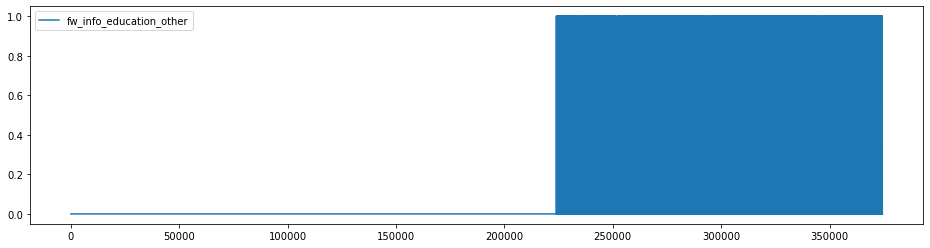

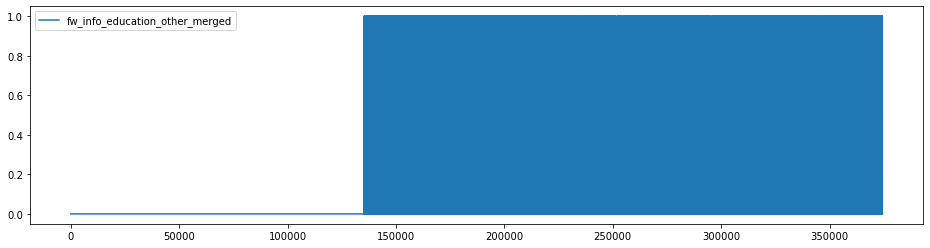

In [10]:
modules.print_count_of_values_relation(visas_df, True, True)

In [11]:
visas_df['fw_info_education_other_merged'].nunique()

3006

Die Spalten wurden erfolgreich bereinigt und zusammengeführt.
Das Vorgeen wird in der cleanup.py in der Funktion `clean_foreign_worker_info_education_other` festgehalten.